In [14]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#### Load the data

In [7]:
# Load the data
iris = datasets.load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)

# Add the 'target' column at the end
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### Clean

In [28]:
# We see that there is nothing to clean
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

#### Vizualize

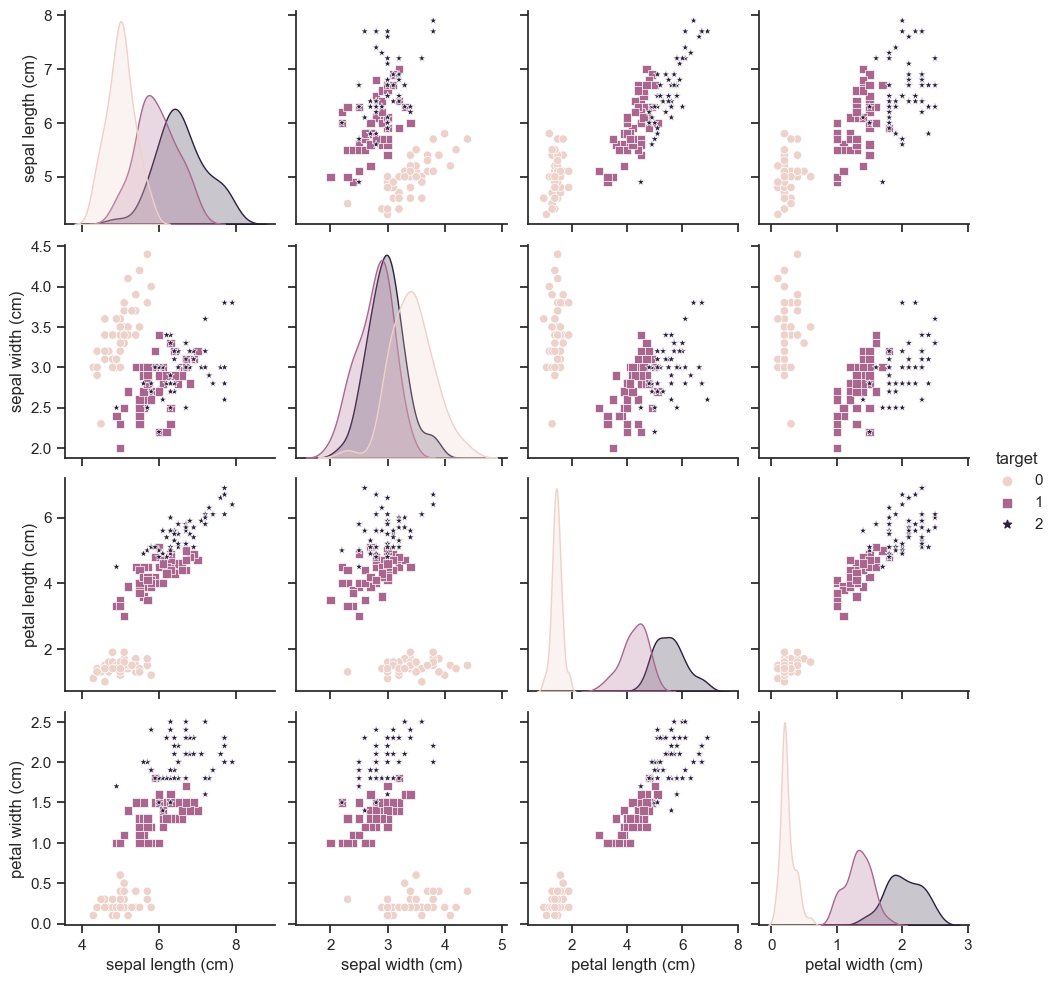

In [9]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(iris_df, 
                 hue = 'target',
                 vars=['sepal length (cm)',
                       'sepal width (cm)',
                       'petal length (cm)',
                       'petal width (cm)',
                      ],                 
                 markers=['o','s','*'])

#### Select features

In [39]:
# From the seaborn vizualization we can see that petal width and petal length have almost no overlappings so they may be a suitable pair
X = iris.data[:, [2, 3]]
y = iris.target

print(f'shape of X:{X.shape}')
print(f'shape of y:{y.shape}')

shape of X:(150, 2)
shape of y:(150,)


#### Separate training and testing data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 2)
(112,)
(38, 2)
(38,)


#### Train

In [37]:
# As we can see that the feature values are very spread we can use a low neighbors count
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

#### Evaluate

In [38]:
y_predicted = knn.predict(X_test)

score = knn.score(X_test, y_test)
score

1.0